# lab 5
**eldad kronfeld 313429607**

**vlad barkanas 317225993**

## 7-9

In [1]:
"""
Created on Tue Oct 13 19:36:13 2020
@author: ravros
#IRIS DATA
"""
#import libraries
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt 
#import pandas as pd 
from pandas import DataFrame
from sklearn.metrics import silhouette_samples, silhouette_score
#import datasets 
from sklearn import datasets

def clust(df,n_cl):
    kmeans = KMeans(n_clusters = n_cl).fit(df)
    res = kmeans.labels_+1      
    centroids = kmeans.cluster_centers_

    plt.scatter(df['x1'], df['x2'], c = res, s=50, alpha = 1)

    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(range(len(res)),res)
    plt.show()
#show the silhouette values for k=3 
    silhouette_avg_ = silhouette_score(df, res)
    sample_silhouette_values_ = silhouette_samples(df, res)  
    plt.plot(sample_silhouette_values_) 
    plt.plot(silhouette_avg_, 'r--')
    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")
    y=silhouette_avg_
    xmin=0
    xmax=len(res)
#The vertical line for average silhouette score of all the values
    plt.hlines(y, xmin, xmax, colors='red', linestyles="--") 
    plt.show()

    print("For n_clusters =", n_cl,
      "The average silhouette_score is:", silhouette_avg_)
    return res



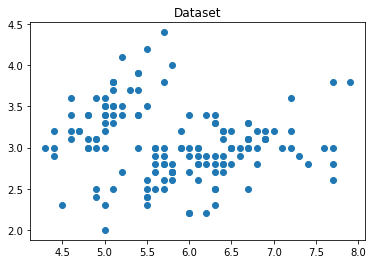

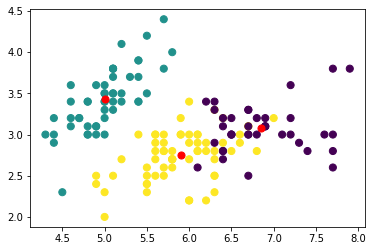

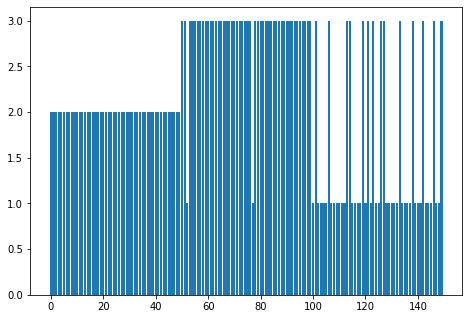

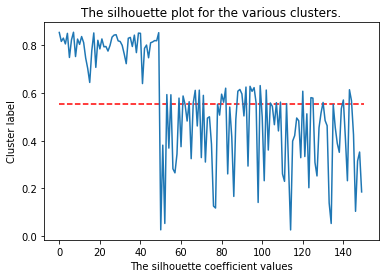

For n_clusters = 3 The average silhouette_score is: 0.5528190123564091


In [2]:
#import datasets 
#from sklearn import datasets
Iris = datasets.load_iris()

y = Iris.data
lb = Iris.target # true labeling
y0 = np.array(y[:,0:4]) #useless as it returns nparray 

x1 = y0[:,0] 
x2 = y0[:,1]
x3 = y0[:,2] 
x4 = y0[:,3]

df = DataFrame(y0, columns=['x1','x2','x3','x4']) 

plt.plot()
plt.subplot()
plt.title('Dataset')
plt.scatter(x1,x2)
plt.show()

res3 = clust(df, 3)

#y2 = np.array(y[50:150,0:4])
#lb2=

100


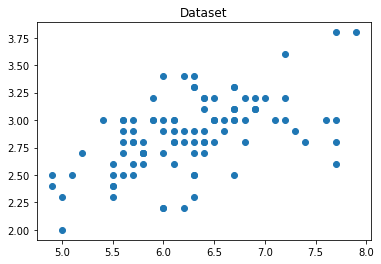

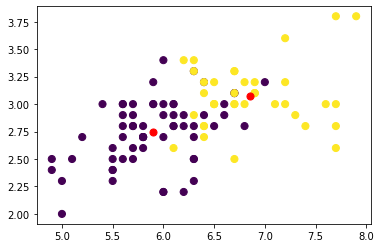

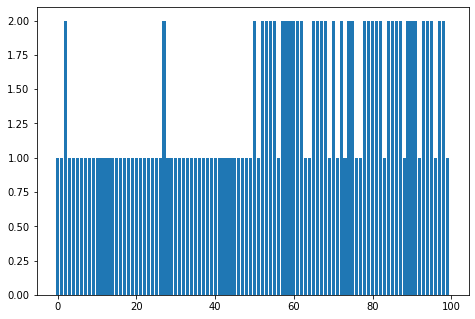

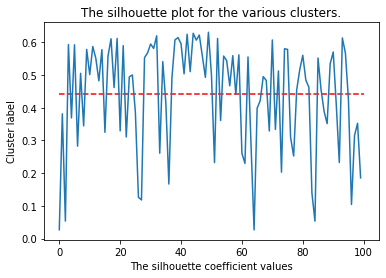

For n_clusters = 2 The average silhouette_score is: 0.440451980007712


In [3]:
#import datasets 
#from sklearn import datasets
Iris = datasets.load_iris()

y = Iris.data
lb = Iris.target # true labeling
y0 = np.array(y[:,0:4]) #useless as it returns nparray 
start = 50;end = 150
x1 = y0[start:end,0] 
x2 = y0[start:end,1]
x3 = y0[start:end,2] 
x4 = y0[start:end,3]
print(len(x1))
df = DataFrame(y0[start:end,0:4], columns=['x1','x2','x3','x4']) 

plt.plot()
plt.subplot()
plt.title('Dataset')
plt.scatter(x1,x2)
plt.show()

res3 = clust(df, 2)



In [9]:
TP = 0;TN = 0;FP = 0;FN = 0
for i in range(start,end):
    if lb[i] == res3[i -start]:
        if lb[i] == 1:
            TP += 1
        else:
            TN += 1
    else:
        if res3[i -] == 1:
            FN += 1
        else:
            FP += 1      
res = np.array([[TP,FN],[FP,TN]])
print(res)

[[48 14]
 [ 2 36]]


## explanation:
as we can see by looking at the avg silhouette score we can see that the clustering process was very successful , and we can confirm that by looking at the confusion matrix stated above and clearly see that the false clasification is very low while the false results were very low compared to that.

In [10]:
TPR = TP/(TP+FN)
FPR = 1 - (TN/(TN+FP))
accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
res = """TPR = {0}
FPR = {1}
accuracy = {2}
precision = {3}"""
print(res.format(TPR,FPR,accuracy,precision))

TPR = 0.7741935483870968
FPR = 0.052631578947368474
accuracy = 0.84
precision = 0.96


## 10 - 12

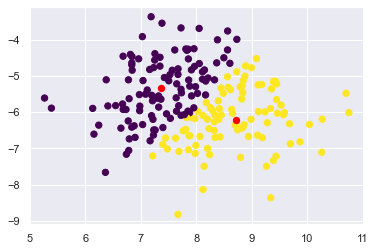

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 13 19:36:13 2020

@author: ravros
"""

#matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=200, centers=2,
                       cluster_std = 0.90, random_state = 5)
X = X[:, ::-1] # flip axes for better plotting

# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(2, random_state = 5)
km = kmeans.fit(X)
labels =km.predict(X)
centr = km.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.scatter(centr[:, 0], centr[:, 1], c='red', s=40, cmap='viridis');
plt.show()




In [7]:
TP = 0;TN = 0;FP = 0;FN = 0
for i in range(0,200):
    if y_true[i] == labels[i]:
        if y_true[i] == 0:
            TP += 1
        else:
            TN += 1
    else:
        if labels[i] == 0:
            FN += 1
        else:
            FP += 1 
res = np.array([[TP,FN],[FP,TN]])
print(res)

[[74 34]
 [26 66]]


In [8]:
TPR = TP/(TP+FN)
FPR = 1 - (TN/(TN+FP))
accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
res = """TPR = {0}
FPR = {1}
accuracy = {2}
precision = {3}"""
print(res.format(TPR,FPR,accuracy,precision))

TPR = 0.6851851851851852
FPR = 0.28260869565217395
accuracy = 0.7
precision = 0.74
